In [2]:
import ee
import geemap
import xarray as xr
!pip install xee
import xee
!pip install rioxarray
import rioxarray


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 75.7 MB/s eta 0:00:00


In [3]:
ee.Authenticate()
ee.Initialize(
    project = 'ee-lavibas23',
    opt_url = 'https://earthengine-highvolume.googleapis.com'
)


In [4]:
map = geemap.Map(basemap = 'SATELLITE')
map


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [5]:
roi = map.draw_last_feature.geometry()

roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Feature.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Feature",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Polygon",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      [
                        [
                          79.813942,
                          6.900183
                        ],
                        [
                          79.813942,
                          6.986066
                        ],
                        [
                          79.905927,
                          6.986066
                        ],
                        [
                          79.905927,
                          6.900183
                        ],
                        [
                          79.813942,
                          6.900183
                        ]
                      ]
                    ]
                  },
                  "geodesic": {
                    "constantValue": false
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

In [6]:
image = (
    ee.ImageCollection("GOOGLE/SATELLITE_EMBEDDING/V1/ANNUAL")
    .filterDate('2021','2022')
    .filterBounds(roi)
    .mosaic()
)

image

In [11]:
ds = xr.open_dataset(
    image,
    engine = 'ee',
    crs = 'EPSG:4326',
    scale = 0.0001,
    geometry = roi
)

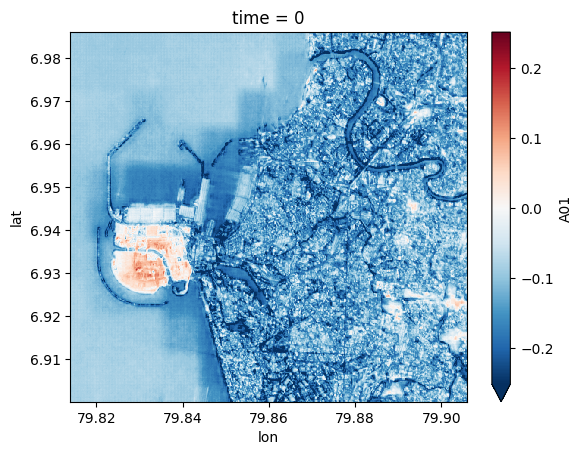

In [20]:
ds.A01.plot(
    x = 'lon',
    y = 'lat',
    robust = True
)


In [13]:
df = ds.to_dataframe()

df

A00       A01       A02       A03       A04  \
time lon       lat                                                          
0    79.813992 6.900233  0.017778 -0.075356 -0.062991 -0.075356 -0.088827   
               6.900333  0.015748 -0.079723 -0.066990 -0.066990 -0.093564   
               6.900433  0.015748 -0.079723 -0.062991 -0.071111 -0.093564   
               6.900533  0.015748 -0.084214 -0.066990 -0.066990 -0.088827   
               6.900633  0.015748 -0.084214 -0.066990 -0.071111 -0.088827   
...                           ...       ...       ...       ...       ...   
     79.905892 6.985633  0.075356 -0.172795  0.147697 -0.098424 -0.093564   
               6.985733  0.075356 -0.214133  0.141730 -0.103406 -0.088827   
               6.985833  0.075356 -0.199862  0.141730 -0.098424 -0.084214   
               6.985933  0.075356 -0.192910  0.147697 -0.098424 -0.079723   
               6.986033  0.084214 -0.179377  0.141730 -0.098424 -0.084214   

                              A05       A06       A07       A08       A09  \
time lon       lat                                                          
0    79.813992 6.900233  0.055363  0.119093  0.093564 -0.003014  0.119093   
               6.900333  0.051734  0.119093  0.093564 -0.000984  0.113741   
               6.900433  0.051734  0.119093  0.088827 -0.001538  0.113741   
               6.900533  0.048228  0.119093  0.093564 -0.000554  0.119093   
               6.900633  0.051734  0.119093  0.088827 -0.002215  0.119093   
...                           ...       ...       ...       ...       ...   
     79.905892 6.985633 -0.038447  0.153787 -0.012057 -0.186082  0.079723   
               6.985733 -0.008858  0.147697  0.015748 -0.186082  0.079723   
               6.985833 -0.007443  0.147697  0.019931 -0.192910  0.075356   
               6.985933 -0.017778  0.147697 -0.007443 -0.206936  0.066990   
               6.986033 -0.003937  0.153787 -0.010396 -0.221453  0.066990   

                         ...       A54       A55       A56       A57  \
time lon       lat       ...                                           
0    79.813992 6.900233  ...  0.041584 -0.017778 -0.035433  0.084214   
               6.900333  ...  0.048228 -0.017778 -0.032541  0.084214   
               6.900433  ...  0.044844 -0.017778 -0.035433  0.084214   
               6.900533  ...  0.044844 -0.017778 -0.035433  0.084214   
               6.900633  ...  0.041584 -0.017778 -0.038447  0.084214   
...                      ...       ...       ...       ...       ...   
     79.905892 6.985633  ...  0.027128 -0.214133  0.048228 -0.103406   
               6.985733  ...  0.051734 -0.206936  0.062991 -0.075356   
               6.985833  ...  0.059116 -0.206936  0.062991 -0.075356   
               6.985933  ...  0.075356 -0.214133  0.048228 -0.066990   
               6.986033  ...  0.093564 -0.214133  0.055363 -0.066990   

                              A58       A59       A60       A61       A62  \
time lon       lat                                                          
0    79.813992 6.900233  0.062991 -0.038447  0.093564 -0.093564  0.029773   
               6.900333  0.062991 -0.038447  0.098424 -0.098424  0.027128   
               6.900433  0.059116 -0.038447  0.098424 -0.098424  0.029773   
               6.900533  0.059116 -0.038447  0.098424 -0.098424  0.024606   
               6.900633  0.059116 -0.035433  0.098424 -0.098424  0.027128   
...                           ...       ...       ...       ...       ...   
     79.905892 6.985633 -0.029773  0.098424 -0.048228 -0.029773  0.017778   
               6.985733 -0.048228  0.119093 -0.051734 -0.041584 -0.027128   
               6.985833 -0.051734  0.119093 -0.062991 -0.038447 -0.038447   
               6.985933 -0.051734  0.108512 -0.024606 -0.044844 -0.071111   
               6.986033 -0.027128  0.108512 -0.038447 -0.041584 -0.066990   

                              A63  
time lon       lat                 
0    79.813992 

In [14]:
from sklearn.cluster import KMeans

In [15]:
model = KMeans(n_clusters = 7, random_state = 42)
model.fit(df)


KMeans(n_clusters=7, random_state=42)

In [16]:
df['cluster'] = model.predict(df)

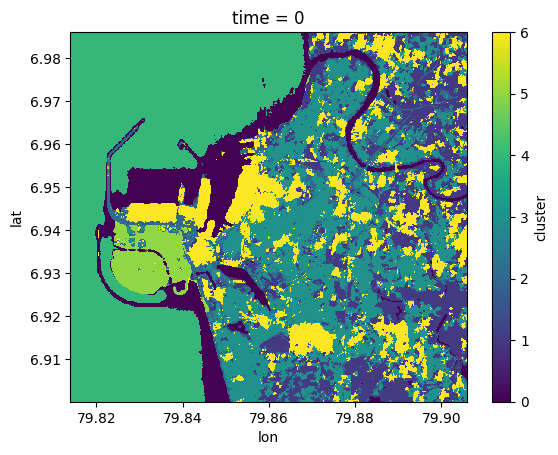

In [24]:
dx = df.to_xarray().sortby(['lat','lon'])

dx.cluster.plot(
    x = 'lon',
    y = 'lat',
    vmin = 0,
    vmax = 6
)

In [18]:
output = dx.cluster.isel(time = 0).drop_vars('time')
output = output.rio.write_crs('EPSG:4326', inplace = True)
output = output.rio.set_spatial_dims(x_dim = 'lon', y_dim = 'lat', inplace = True)
output = output.rio.write_coordinate_system(inplace = True)
output = output.transpose('lat', 'lon')
output.rio.to_raster('embedding_cluster.tif')